In [7]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

## Cholesky decomposition

In [ ]:
from scipy import random, linalg
def generate_positive_definite_matrix(x):
    A = random.rand(x,x)
    B = np.dot(A,A.transpose())
    return B

In [ ]:
times=[]
for size in range(1000):
    data=generate_positive_definite_matrix(1000)
    start = time.time()
    np.linalg.cholesky(data)
    end = time.time()
    times.append(end - start)

In [ ]:
plt.plot(times)

In [ ]:
np.mean(times)


In [ ]:
times=[]
for size in range(1000):
    data=generate_positive_definite_matrix(size)
    start = time.time()
    np.linalg.cholesky(data)
    end = time.time()
    times.append(end - start)

In [ ]:
plt.plot(times)

## Large file operations

### Create a structured NxM dataset of 64 bit precision floats 

In [36]:
num_rows=10000
num_columns=1000

In [37]:
large_data=pd.DataFrame(np.random.rand(num_rows,num_columns), columns=['s' + str(x) for x in range(num_columns)])

In [38]:
large_data.head()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s990,s991,s992,s993,s994,s995,s996,s997,s998,s999
0,0.094511,0.143113,0.225843,0.287334,0.503658,0.191771,0.959875,0.327380,0.536864,0.131369,...,0.816402,0.244572,0.917704,0.474035,0.569685,0.850994,0.395474,0.269698,0.681805,0.370162
1,0.307498,0.920031,0.314734,0.386908,0.192934,0.547035,0.137393,0.714491,0.974568,0.605994,...,0.243675,0.822005,0.721392,0.153924,0.742086,0.101868,0.988638,0.152789,0.522342,0.067061
2,0.260936,0.693814,0.822246,0.397795,0.706931,0.203226,0.306601,0.383148,0.618669,0.403875,...,0.915170,0.402854,0.830432,0.711949,0.215858,0.345542,0.239821,0.756024,0.375101,0.747183
3,0.797338,0.335468,0.434307,0.848685,0.122490,0.404364,0.539589,0.060932,0.972283,0.223774,...,0.836609,0.008077,0.802679,0.852414,0.394907,0.245113,0.225190,0.049417,0.987385,0.663944
4,0.832507,0.610257,0.320844,0.487679,0.645151,0.689860,0.698817,0.630889,0.322380,0.192769,...,0.366980,0.065518,0.507296,0.928087,0.418979,0.620955,0.292652,0.379492,0.537514,0.476869


### Write data to csv and parquet

In [34]:
%%timeit
large_data.to_csv("../data/large_data.csv", index=False)

13 s ± 232 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%%timeit
large_data.to_parquet("../data/large_data.parquet")

2.28 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Read data from csv and parquet

In [40]:
%%timeit
large_data=pd.read_csv("../data/large_data.csv")

2.33 s ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%%timeit
large_data=pd.read_parquet("../data/large_data.parquet")

195 ms ± 3.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Search data within a matrix

### Create matrix

In [44]:
matrix = np.random.randint(low=0,high=100,size=(100,100))

In [47]:
matrix

array([[35, 21, 67, ..., 91, 84, 24],
       [86, 96, 96, ..., 69, 25, 18],
       [90, 64, 98, ..., 62,  4, 36],
       ...,
       [70, 67, 18, ..., 60, 88,  4],
       [94, 68, 17, ..., 25, 49, 49],
       [59, 29, 87, ..., 43, 62, 10]])

### search for a value in the matrix

In [72]:
# %%timeit
np.where(matrix == 5)

(array([ 0,  0,  2,  3,  3,  4,  5,  6,  7,  7,  7,  9,  9, 11, 14, 15, 16,
        16, 17, 20, 20, 20, 20, 23, 23, 23, 25, 26, 27, 27, 28, 29, 29, 30,
        31, 34, 34, 35, 37, 38, 38, 39, 40, 40, 40, 41, 42, 42, 42, 42, 42,
        43, 43, 45, 46, 47, 49, 49, 49, 51, 51, 52, 52, 53, 53, 54, 55, 55,
        56, 59, 60, 63, 68, 68, 71, 72, 72, 75, 76, 80, 80, 81, 82, 83, 83,
        84, 84, 86, 88, 90, 91, 95, 96, 97, 98, 99]),
 array([ 3, 28, 56, 17, 64,  3, 76, 69, 22, 69, 81,  5, 58, 15, 62, 55, 52,
        61,  5, 17, 43, 49, 62, 50, 55, 90, 92, 77,  2, 71, 17, 85, 98, 37,
        41, 34, 41,  9, 53, 29, 94, 73, 26, 72, 76, 29,  3, 20, 69, 87, 98,
        38, 45, 45, 70,  8, 35, 41, 95, 83, 87,  2, 35, 31, 81, 40, 42, 47,
        86, 91, 42, 67, 43, 72, 12, 32, 63, 37, 93,  6, 38, 67, 30, 23, 34,
        26, 64, 78, 96, 99, 97, 94, 14, 46, 38, 91]))

In [80]:
# %%timeit
np.where(matrix < 2)

(array([ 0,  0,  1,  1,  1,  2,  3,  3,  4,  4,  4,  4,  4,  5,  5,  6,  7,
         7,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 12, 12, 14,
        14, 14, 14, 15, 15, 17, 17, 17, 17, 17, 17, 17, 18, 18, 19, 19, 20,
        21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27,
        27, 27, 27, 28, 28, 29, 29, 30, 31, 32, 32, 32, 33, 33, 34, 34, 35,
        35, 36, 36, 36, 38, 39, 40, 40, 41, 41, 42, 43, 44, 45, 45, 46, 46,
        46, 46, 47, 47, 48, 48, 48, 48, 49, 50, 50, 50, 52, 52, 53, 54, 54,
        54, 54, 55, 56, 56, 56, 57, 57, 57, 57, 58, 59, 59, 59, 60, 60, 61,
        61, 61, 61, 62, 62, 63, 64, 65, 66, 66, 66, 67, 67, 68, 68, 69, 69,
        69, 69, 70, 71, 71, 72, 74, 74, 75, 75, 75, 75, 75, 77, 78, 78, 79,
        79, 79, 79, 80, 81, 81, 81, 82, 82, 82, 82, 83, 83, 83, 87, 88, 88,
        88, 88, 89, 90, 90, 90, 90, 91, 93, 94, 94, 96, 96, 98, 99, 99, 99]),
 array([ 8, 35, 73, 76, 82, 65, 11, 18, 29, 32, 50, 73, 90, 33, 88, 41, 67,
        92

In [74]:
# %%timeit
np.argmax(matrix, axis=1)

array([63, 15, 43, 51, 42, 59,  8, 65, 92, 40, 20, 11, 64, 25, 13, 54, 75,
       70, 26, 70, 27, 87, 44, 38, 79, 62, 93, 48, 39, 77, 15, 20, 10, 16,
       43, 48, 14, 40, 16, 68,  1, 62, 37, 95,  3, 37, 12, 81, 43, 38, 44,
       20,  7,  1, 88,  5,  1, 12, 78, 96, 27, 10, 97, 21, 14, 43, 59, 16,
       41, 12, 79, 71, 78, 76, 70, 48, 78,  9, 29, 69,  0, 92, 74, 94, 75,
       31, 71, 44, 25, 58, 21,  1, 41, 49, 82, 26, 37, 47, 27,  4])

In [75]:
# %%timeit
np.argmin(matrix, axis=1)

array([ 8, 73, 65, 18, 29, 33, 41, 67, 11, 13,  9, 14, 85, 13, 39, 74, 32,
       40, 81, 25, 30, 25, 19, 80, 90, 20, 47, 52, 16, 11, 65, 97, 45,  0,
       22, 91,  0, 70, 48, 45, 50,  5, 16, 73, 88, 82, 31, 56, 21, 80, 39,
       69, 15,  2, 19, 14, 41, 90, 79, 29, 65, 73, 22, 65, 65, 17, 42, 62,
       31, 45, 12, 75, 37, 51, 94, 45, 42,  2, 71, 50, 75, 38, 19, 85, 17,
       47, 93, 42,  7, 88, 50, 88, 90, 19, 73, 43, 31, 67, 49, 25])

### Sort a matrix

In [79]:
# %%timeit
np.sort(matrix, kind='quicksort', axis=1)

array([[ 0,  0,  2, ..., 96, 96, 98],
       [ 0,  0,  0, ..., 96, 97, 99],
       [ 1,  2,  4, ..., 98, 99, 99],
       ...,
       [ 2,  3,  4, ..., 98, 98, 99],
       [ 1,  5,  6, ..., 94, 95, 97],
       [ 0,  0,  1, ..., 96, 98, 98]])

## Interpolation

### Use the following documentation to explore varieties of interpolations-https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

1. 1D vs 2D interpolation
2. Spline vs RBF vs generic (linear, quadratic, cubic etc) interpolation
3. Univariate vs multivariate interpolation

In [90]:
from scipy.interpolate import interp1d

### 1-D interpolation

#### create data for generating interpolation function

In [111]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

#### possible options of interpolation methods ‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, ‘next’, where ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ 

In [94]:
f = interp1d(x, y, kind='linear')
f2 = interp1d(x, y, kind='cubic')
f3 = interp1d(x, y, kind='quadratic')

#### interpolating at 100 different points and plotting it

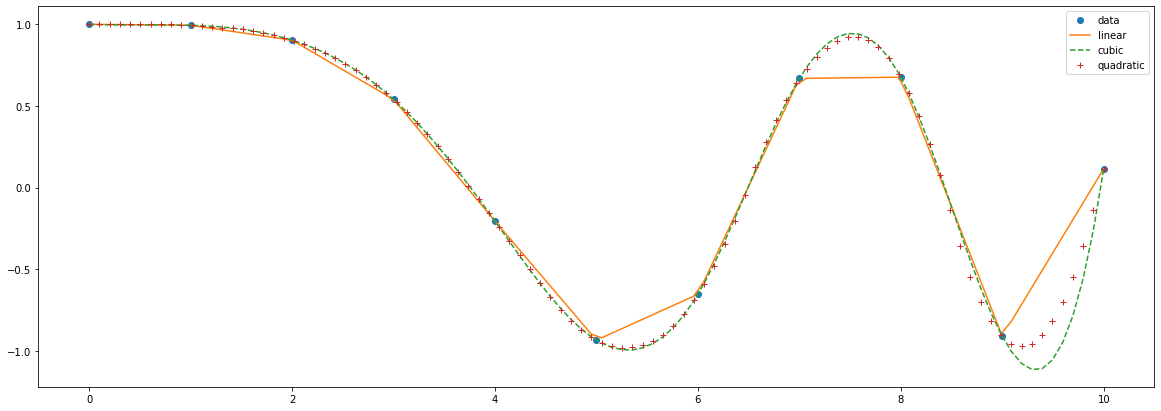

In [112]:
plt.figure(figsize=(20,7))
xnew = np.linspace(0, 10, num=100, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '+')
plt.legend(['data', 'linear', 'cubic', 'quadratic'], loc='best')

## Multicolumn sort

In [120]:
data_for_multicolumn_sort=pd.DataFrame(np.random.randint(low=0,high=100,size=(100,100)), columns=['s' + str(x) for x in range(100)])
data_for_multicolumn_sort.head()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,46,14,22,62,34,50,69,72,90,63,...,92,88,64,59,54,40,20,33,21,73
1,51,48,27,42,74,34,95,8,76,90,...,50,84,78,8,23,21,41,63,72,80
2,82,95,56,5,84,24,38,82,89,14,...,50,82,63,99,6,15,86,62,33,3
3,54,19,82,5,73,45,61,85,22,62,...,76,62,26,38,41,8,81,43,68,48
4,28,2,44,72,76,54,45,21,50,76,...,67,97,29,13,82,40,44,18,20,82


In [124]:
multicolumns=['s5', 's2', 's9']
ascending_order=[True, False, True]
sorted_data=data_for_multicolumn_sort.sort_values(multicolumns, ascending=ascending_order)
sorted_data.head(20)

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
92,58,49,48,9,87,1,42,34,36,34,...,61,40,20,35,47,11,96,96,53,10
56,68,4,24,16,9,1,75,10,52,95,...,63,14,63,54,25,97,57,24,99,60
7,17,8,0,9,10,1,90,2,62,97,...,43,77,1,69,84,46,69,18,35,47
9,26,64,81,35,16,4,73,65,68,96,...,2,85,94,87,85,4,28,71,0,99
36,49,80,6,48,9,6,2,11,12,88,...,95,74,53,31,9,44,62,88,11,93
13,9,86,50,92,14,7,78,68,77,93,...,43,16,79,54,7,92,29,28,64,93
91,18,64,93,30,33,9,73,4,46,58,...,49,63,67,28,4,83,62,59,16,43
12,94,28,40,30,78,9,55,69,3,80,...,8,46,27,40,32,7,2,16,34,60
10,88,33,44,32,93,11,75,35,24,70,...,45,54,90,8,29,32,46,28,26,35
46,28,50,82,50,5,13,48,29,8,51,...,76,88,88,74,40,60,42,88,7,35


## Matrix common operations

In [125]:
np.ravel(matrix)

array([35, 21, 67, ..., 43, 62, 10])

In [126]:
np.reshape(matrix, (1000,10))

array([[35, 21, 67, ..., 52,  0,  2],
       [14, 39, 96, ..., 55,  3, 37],
       [24, 16, 35, ..., 68,  5, 70],
       ...,
       [96, 81, 95, ..., 69,  0, 55],
       [77, 31, 43, ..., 20, 44, 48],
       [67,  5, 24, ..., 43, 62, 10]])

In [128]:
np.reshape(matrix, (100,10,10))

array([[[35, 21, 67, ..., 52,  0,  2],
        [14, 39, 96, ..., 55,  3, 37],
        [24, 16, 35, ..., 68,  5, 70],
        ...,
        [ 9, 90, 22, ..., 82, 16, 40],
        [15, 71, 42, ..., 33, 80, 23],
        [41, 94, 24, ..., 91, 84, 24]],

       [[86, 96, 96, ..., 97, 16, 37],
        [78, 80, 83, ..., 41, 31, 79],
        [10, 55, 82, ..., 60, 55, 31],
        ...,
        [28, 83, 47, ..., 82, 94, 14],
        [88, 27,  0, ..., 16, 59,  3],
        [16, 78, 91, ..., 69, 25, 18]],

       [[90, 64, 98, ..., 83, 45, 17],
        [25, 42, 29, ..., 60, 27, 86],
        [ 2, 92, 47, ..., 84, 88, 72],
        ...,
        [18,  9, 86, ..., 63,  7, 49],
        [ 8, 87, 45, ..., 91, 29, 99],
        [92,  8, 87, ..., 62,  4, 36]],

       ...,

       [[70, 67, 18, ...,  9,  7, 68],
        [93, 14, 44, ..., 31, 98, 43],
        [81, 63, 70, ..., 12, 78, 24],
        ...,
        [32, 23, 74, ...,  9, 14, 29],
        [55, 66, 62, ..., 65, 83, 82],
        [44, 82, 14, ..., 60, 88

In [131]:
np.flip(matrix, axis=0)

array([[24, 84, 91, ..., 67, 21, 35],
       [18, 25, 69, ..., 96, 96, 86],
       [36,  4, 62, ..., 98, 64, 90],
       ...,
       [ 4, 88, 60, ..., 18, 67, 70],
       [49, 49, 25, ..., 17, 68, 94],
       [10, 62, 43, ..., 87, 29, 59]])

In [132]:
np.flip(matrix, axis=1)

array([[24, 84, 91, ..., 67, 21, 35],
       [18, 25, 69, ..., 96, 96, 86],
       [36,  4, 62, ..., 98, 64, 90],
       ...,
       [ 4, 88, 60, ..., 18, 67, 70],
       [49, 49, 25, ..., 17, 68, 94],
       [10, 62, 43, ..., 87, 29, 59]])